In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd

In [2]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/metadata.csv')

In [4]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_hor_magdisp,max_dia_magdisp,max_tor_magdisp,category,num_tets,mass,density,principal_str1,principal_str2,VM_stress,max_disp,mean_curvature
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.321826,0.239873,0.165667,0.174951,block,570111,1.375163,0.000004,659.877164,413.029336,578.325069,0.321826,-0.008780
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1.000106,0.611791,0.399737,beam,431759,0.464950,0.000004,1062.370300,903.485300,993.165361,1.222151,0.075559
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,0.965408,3.761250,0.495712,block,314815,0.514034,0.000004,4824.582762,1664.634238,4244.898019,4.433872,0.007987
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1.608428,0.375712,0.583333,beam,293971,0.399288,0.000004,1016.793306,949.083394,985.716598,1.608428,0.083035
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1.880950,0.787904,0.604398,beam,481030,0.350834,0.000004,1926.024972,1671.480028,1812.893841,2.183306,0.067319


In [28]:
cad_data.to_csv('/Users/User/Documents/Project_JEB/JEB_Data/metadata.csv', index=False)

In [5]:
print(cad_data.shape)
cad_data.head(5)

(381, 20)


,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_hor_magdisp,max_dia_magdisp,max_tor_magdisp,category,num_tets,mass,density,principal_str1,principal_str2,VM_stress,max_disp,mean_curvature
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.321826,0.239873,0.165667,0.174951,block,570111,1.375163,0.000004,659.877164,413.029336,578.325069,0.321826,-0.008780
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1.000106,0.611791,0.399737,beam,431759,0.464950,0.000004,1062.370300,903.485300,993.165361,1.222151,0.075559
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,0.965408,3.761250,0.495712,block,314815,0.514034,0.000004,4824.582762,1664.634238,4244.898019,4.433872,0.007987
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1.608428,0.375712,0.583333,beam,293971,0.399288,0.000004,1016.793306,949.083394,985.716598,1.608428,0.083035
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1.880950,0.787904,0.604398,beam,481030,0.350834,0.000004,1926.024972,1671.480028,1812.893841,2.183306,0.067319


In [30]:
cad_data['ver_stiffness'] = cad_data['max_ver_stress'] / cad_data['max_ver_magdisp']
cad_data['hor_stiffness'] = cad_data['max_hor_stress'] / cad_data['max_hor_magdisp']
cad_data['dia_stiffness'] = cad_data['max_dia_stress'] / cad_data['max_dia_magdisp']
cad_data['tor_stiffness'] = cad_data['max_tor_stress'] / cad_data['max_tor_magdisp']

In [32]:
stiff_columns = ['ver_stiffness', 'hor_stiffness', 'dia_stiffness', 'tor_stiffness']
cad_data['max_stiffness'] = cad_data[stiff_columns].min(axis=1)

In [35]:
disp_columns = ['max_ver_magdisp', 'max_hor_magdisp', 'max_dia_magdisp', 'max_tor_magdisp']
cad_data['max_displacement'] = cad_data[disp_columns].max(axis=1)

In [42]:
stress_columns = ['max_ver_stress', 'max_hor_stress', 'max_dia_stress', 'max_tor_stress']
cad_data['max_stress'] = cad_data[disp_columns].max(axis=1)

In [36]:
stiffest_id = cad_data.loc[cad_data['max_displacement'].idxmin(), 'id']
print(stiffest_id)

411


In [37]:
lightest_id = cad_data.loc[cad_data['mass'].idxmin(), 'id']
print(lightest_id)

373


In [33]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_xdisp,max_ver_ydisp,max_ver_zdisp,...,max_tor_magdisp,max_tor_stress,category,num_tets,mass,ver_stiffness,hor_stiffness,dia_stiffness,tor_stiffness,max_stiffness
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.176923,0.073638,0.288827,...,0.174951,325.8028,block,570111,1.375163,2046.381332,1727.281027,1925.742090,1862.257038,1727.281027
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,0.687567,0.426113,1.059176,...,0.399737,432.3469,beam,431759,0.464950,865.265421,908.274323,1229.726189,1081.579200,865.265421
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,1.180213,2.789576,3.713256,...,0.495712,906.2914,block,314815,0.514034,1087.809481,1725.703858,1154.479495,1828.261606,1087.809481
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.044753,0.299482,1.285331,...,0.583333,676.9794,beam,293971,0.399288,665.399766,594.948422,1250.456998,1160.537772,594.948422
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,1.391756,0.360266,1.927059,...,0.604398,826.2255,beam,481030,0.350834,768.351756,1020.738457,1913.315582,1367.023132,768.351756


In [29]:
stiffest_id = cad_data.loc[cad_data['max_dia_magdisp'].idxmin(), 'id']
print(stiffest_id)

492


In [31]:
lightest_id = cad_data.loc[cad_data['mass'].idxmin(), 'id']
print(lightest_id)

373


In [30]:
stiffest_properties = cad_data.loc[cad_data['max_dia_magdisp'].idxmin()]
print(stiffest_properties)

id                               492
num_vertices                   18174
num_faces                      36368
volume                 406146.067313
surface_area            55067.845354
average_edge_length         1.862013
genus                            6.0
max_ver_magdisp              0.25114
max_hor_magdisp             0.211747
max_dia_magdisp             0.091126
max_tor_magdisp             0.038298
category                        flat
num_tets                      223142
mass                        1.815473
density                     0.000004
principal_str1            542.469368
principal_str2            305.399532
VM_stress                 471.258606
Name: 296, dtype: object


In [33]:
lightest_properties = cad_data.loc[cad_data['mass'].idxmin()]
print(lightest_properties)

id                              373
num_vertices                  26002
num_faces                     52020
volume                 44375.910428
surface_area           24680.132916
average_edge_length        0.959877
genus                           5.0
max_ver_magdisp            2.775268
max_hor_magdisp            4.599846
max_dia_magdisp            1.189664
max_tor_magdisp            0.304552
category                       arch
num_tets                     268499
mass                        0.19836
density                    0.000004
principal_str1          3750.005523
principal_str2          3434.895477
VM_stress               3602.975776
Name: 223, dtype: object


In [42]:
max_displacement_id = cad_data.loc[cad_data['max_dia_magdisp'].idxmax(), 'id']
print(max_displacement_id)

141


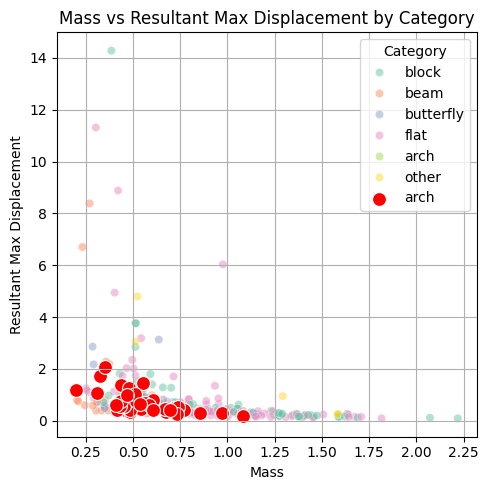

In [41]:
arches = cad_data[cad_data['category']=='arch']
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="mass",
    y="max_dia_magdisp",
    hue="category",
    palette="Set2",
    alpha=0.5
)
sns.scatterplot(
    data=arches,
    x="mass",
    y="max_dia_magdisp",
    color="red",
    label="arch",
    s=100,  # Larger size for better visibility
    alpha=1
)
plt.title(f"Mass vs Resultant Max Displacement by Category")
plt.xlabel("Mass")
plt.ylabel("Resultant Max Displacement")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


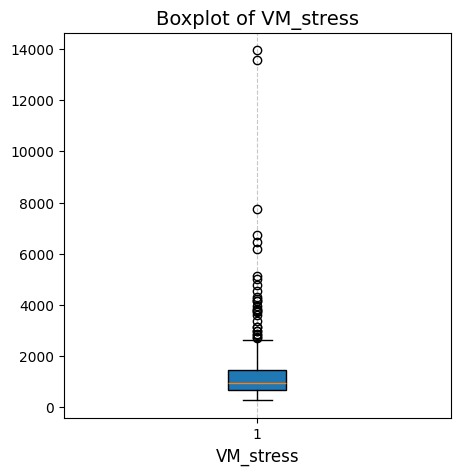

In [6]:
plt.figure(figsize=(5, 5))
plt.boxplot(cad_data['VM_stress'], patch_artist=True)
plt.title(f"Boxplot of VM_stress", fontsize=14)
plt.xlabel('VM_stress', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [3]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv')

In [8]:
disp_columns = ['max_ver_magdisp', 'max_hor_magdisp', 'max_dia_magdisp', 'max_tor_magdisp']
cad_data['max_disp'] = cad_data[disp_columns].max(axis=1)

In [41]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_xdisp,max_ver_ydisp,max_ver_zdisp,...,max_tor_stress,category,num_tets,mass,ver_stiffness,hor_stiffness,dia_stiffness,tor_stiffness,max_stiffness,max_displacement
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.176923,0.073638,0.288827,...,325.8028,block,570111,1.375163,2046.381332,1727.281027,1925.742090,1862.257038,1727.281027,0.321826
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,0.687567,0.426113,1.059176,...,432.3469,beam,431759,0.464950,865.265421,908.274323,1229.726189,1081.579200,865.265421,1.222151
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,1.180213,2.789576,3.713256,...,906.2914,block,314815,0.514034,1087.809481,1725.703858,1154.479495,1828.261606,1087.809481,4.433872
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.044753,0.299482,1.285331,...,676.9794,beam,293971,0.399288,665.399766,594.948422,1250.456998,1160.537772,594.948422,1.608428
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,1.391756,0.360266,1.927059,...,826.2255,beam,481030,0.350834,768.351756,1020.738457,1913.315582,1367.023132,768.351756,2.183306


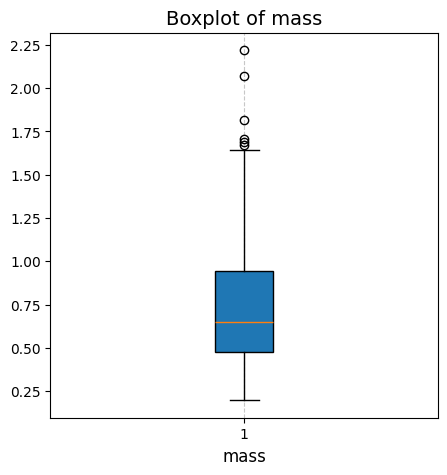

In [39]:
plt.figure(figsize=(5, 5))
plt.boxplot(cad_data['mass'], patch_artist=True)
plt.title(f"Boxplot of mass", fontsize=14)
plt.xlabel('mass', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

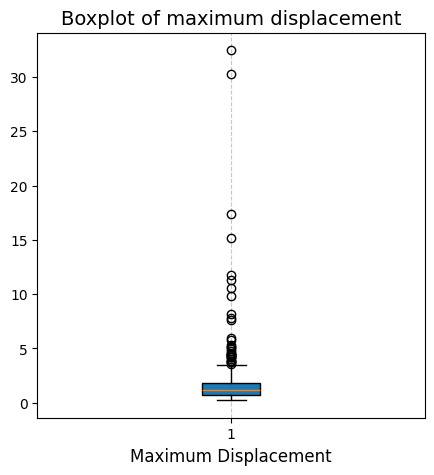

In [38]:
plt.figure(figsize=(5, 5))
plt.boxplot(cad_data['max_displacement'], patch_artist=True)
plt.title(f"Boxplot of maximum displacement", fontsize=14)
plt.xlabel('Maximum Displacement', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [59]:
q1 = cad_data['max_stress'].quantile(0.25)
q3 = cad_data['max_stress'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = cad_data[(cad_data['max_stress'] < lower_bound) | (cad_data['max_stress'] > upper_bound)]
stress_outliers = outliers['id'].to_numpy()

In [60]:
stress_outliers

array([  6,  23,  35, 121, 130, 136, 141, 175, 204, 220, 236, 245, 246,
       266, 270, 308, 309, 373, 398, 406, 418, 419, 427, 459, 479, 518,
       587, 600, 605, 611, 623, 625, 633])

In [61]:
q1 = cad_data['mass'].quantile(0.25)
q3 = cad_data['mass'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = cad_data[(cad_data['mass'] < lower_bound) | (cad_data['mass'] > upper_bound)]
mass_outliers = outliers['id'].to_numpy()

In [62]:
q1 = cad_data['max_displacement'].quantile(0.25)
q3 = cad_data['max_displacement'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = cad_data[(cad_data['max_displacement'] < lower_bound) | (cad_data['max_displacement'] > upper_bound)]
disp_outliers = outliers['id'].to_numpy()

In [63]:
outlier_idx = []
for stress_idx in stress_outliers:
    for disp_idx in disp_outliers:
        if stress_idx==disp_idx:
            outlier_idx.append(stress_idx)
print(outlier_idx)

[6, 23, 35, 121, 130, 136, 141, 175, 204, 220, 236, 245, 246, 266, 270, 308, 309, 373, 398, 406, 418, 419, 427, 459, 479, 518, 587, 600, 605, 611, 623, 625, 633]


In [13]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv')

In [15]:
cad_data = cad_data[cad_data['mass'] < cad_data['mass'].quantile(0.75)]

In [18]:
mean_curvatures = []


mesh_base_path = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/"


for mesh_id in cad_data['id']:
    try:
       
        mesh_file = f"{mesh_base_path}{mesh_id}.obj"
        mesh = pv.read(mesh_file)
        
      
        surface_mesh = mesh.extract_surface()
        mean_curvature = np.mean(surface_mesh.curvature(curv_type='mean'))
        
    except Exception as e:
       
        print(f"Error processing file {mesh_file}: {e}")
        mean_curvature = np.nan
    
    
    mean_curvatures.append(np.abs(mean_curvature))


cad_data['mean_curvature'] = mean_curvatures

/var/folders/j3/nf3_zjf95vb6pp_w3_1bds0w0000gn/T/ipykernel_11974/2469386931.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cad_data['mean_curvature'] = mean_curvatures


In [19]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,...,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress,mean_curvature
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,...,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485,0.075562
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,...,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208,0.007987
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,...,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945,0.083035
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,...,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958,0.067319
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,...,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448,0.037433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,...,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465,0.045066
376,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,...,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120,0.070349
377,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,...,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283,0.081732
378,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,...,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522,0.067916


In [21]:
cad_data.to_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv', index=False)

In [12]:


cad_data['High_Stress_Area'] = 0  

for part_id in cad_data['id']:
    
    print(part_id)
    vtk_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_volmesh_(vtk)/{part_id}.vtk"
    if part_id <= 308:
        fea_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf/{part_id}field.csv"
    else:
        fea_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._secondhalf/SimJEB_simresults_(csv)_secondhalf/{part_id}field.csv"
    
   
    mesh = pv.read(vtk_file_path)

    
    sim_data = pd.read_csv(fea_file_path)
    stress_columns = ['ver_stress', 'hor_stress', 'dia_stress', 'tor_stress']
    sim_data['Stress'] = sim_data[stress_columns].max(axis=1)

   
    stress = sim_data['Stress'].values
    mesh.point_data['Stress'] = stress

    
    stress_threshold = 2500.0  
    critical_areas = mesh.threshold(value=stress_threshold, scalars='Stress')

   
    cad_data.loc[cad_data['id'] == part_id, 'High_Stress_Area'] = critical_areas.n_points


updated_cad_data_path = '/Users/User/Documents/Project_JEB/Results/Data_Analysis/updated_cad_data.csv'
cad_data.to_csv(updated_cad_data_path, index=False)


0
4
6
8
9
10
12
14
15
16
19
20
21
22
23
25
27
28
29
30
33
34
35
38
39
40
50
51
53
55
56
58
59
61
62
63
64
65
66
69
70
71
72
73
76
77
78
79
80
81
82
86
87
91
92
94
95
96
97
98
101
102
106
107
108
112
113
114
115
116
119
120
121
122
123
124
125
127
129
130
131
133
134
135
136
138
139
140
141
142
146
147
148
149
150
152
153
163
164
165
166
167
169
170
171
173
174
175
177
180
181
182
183
185
186
187
191
192
193
194
195
196
197
198
199
200
202
204
205
206
207
208
209
211
213
214
217
220
221
223
225
228
229
230
233
234
235
236
237
238
240
241
242
245
246
247
248
249
252
254
255
256
257
258
259
261
262
266
267
268
269
270
271
275
279
280
281
282
284
285
289
290
291
293
295
296
297
302
306
308
309
310
311
312
316
318
319
320
321
322
323
324
325
329
331
332
335
336
337
339
342
345
348
351
356
357
361
362
364
365
366
369
371
373
374
375
377
378
379
380
382
383
384
386
387
388
389
390
393
394
395
398
400
403
406
407
411
412
413
415
416
417
418
419
420
421
422
424
425
427
428
432
433
434
437
438
4